<a href="https://colab.research.google.com/github/egonloch/DNC/blob/main/Desafio_5_Egon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.pipeline import Pipeline


In [ ]:
#importação dos dados
df = pd.read_csv('/content/data.csv', encoding='latin1')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


# **EDA**

In [ ]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [ ]:
#identificaçao de valores nulos
df.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [ ]:
#clientes sem identificaçao e produtos sem descriçao nao podem entrar no modelo
df[df['CustomerID'].isna()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,12/1/2010 11:52,0.00,NaN,United Kingdom
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,12/1/2010 14:32,2.51,NaN,United Kingdom
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,12/1/2010 14:32,2.51,NaN,United Kingdom
1445,536544,21786,POLKADOT RAIN HAT,4,12/1/2010 14:32,0.85,NaN,United Kingdom
1446,536544,21787,RAIN PONCHO RETROSPOT,2,12/1/2010 14:32,1.66,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
541536,581498,85099B,JUMBO BAG RED RETROSPOT,5,12/9/2011 10:26,4.13,NaN,United Kingdom
541537,581498,85099C,JUMBO BAG BAROQUE BLACK WHITE,4,12/9/2011 10:26,4.13,NaN,United Kingdom
541538,581498,85150,LADIES & GENTLEMEN METAL SIGN,1,12/9/2011 10:26,4.96,NaN,United Kingdom
541539,581498,85174,S/4 CACTI CANDLES,1,12/9/2011 10:26,10.79,NaN,United Kingdom


In [ ]:
#igorar linhas com valores nulos
df = df.dropna()

#confirmaçao que nao tem mais valores nulos
df.isna().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [ ]:
#analisando a existencia de valores nulos ou negativos nas colunas preço e quantidade
df[['UnitPrice', 'Quantity']].describe()

,UnitPrice,Quantity
count,406829.000000,406829.000000
mean,3.460471,12.061303
std,69.315162,248.693370
min,0.000000,-80995.000000
25%,1.250000,2.000000
50%,1.950000,5.000000
75%,3.750000,12.000000
max,38970.000000,80995.000000


In [ ]:
# filtrar valores nulos e menores que zero nas colunas
df = df[(df['UnitPrice'] > 0) & (df['Quantity'] > 0)]

# confirmar que nao existe mais valores nulos ou menores que zero
df[['UnitPrice', 'Quantity']].describe()

,UnitPrice,Quantity
count,397884.000000,397884.000000
mean,3.116488,12.988238
std,22.097877,179.331775
min,0.001000,1.000000
25%,1.250000,2.000000
50%,1.950000,6.000000
75%,3.750000,12.000000
max,8142.750000,80995.000000


In [ ]:
#identificaçao se existe valores duplicados
df.duplicated().sum().any()


True

In [ ]:
#identificaçao de valores duplicados por grupo
(
    df
.groupby(df.columns.tolist(), dropna=False)
.size()
.to_frame('n_duplicates')
.query('n_duplicates>1')
.sort_values('n_duplicates', ascending=False)
.head(10)
)

n_duplicates
InvoiceNo StockCode Description                         Quantity InvoiceDate      UnitPrice CustomerID Country                     
555524    22698     PINK REGENCY TEACUP AND SAUCER      1        6/5/2011 11:37   2.95      16923.0    United Kingdom            20
          22697     GREEN REGENCY TEACUP AND SAUCER     1        6/5/2011 11:37   2.95      16923.0    United Kingdom            12
572861    22775     PURPLE DRAWERKNOB ACRYLIC EDWARDIAN 12       10/26/2011 12:46 1.25      14102.0    United Kingdom             8
541266    21755     LOVE BUILDING BLOCK WORD            1        1/16/2011 16:25  5.95      15673.0    United Kingdom             6
538514    21756     BATH BUILDING BLOCK WORD            1        12/12/2010 14:27 5.95      15044.0    United Kingdom             6
572344    M         Manual                              48       10/24/2011 10:43 1.50      14607.0    United Kingdom             6
540524    21756     BATH BUILDING BLOCK WORD            1        1/9/2011 12:53   5.95      16735.0    United Kingdom             6
541266    21754     HOME BUILDING BLOCK WORD            1        1/16/2011 16:25  5.95      15673.0    United Kingdom             6
578289    23395     BELLE JARDINIERE CUSHION COVER      1        11/23/2011 14:07 3.75      17841.0    United Kingdom             6
574481    23084     RABBIT NIGHT LIGHT                  1        11/4/2011 12:45  2.08      18022.0    United Kingdom             5

In [ ]:
#removendo as duplicadas
df = df.drop_duplicates()

#confirmaçao que nao tem mais dados duplicados
df.duplicated().sum().any()

False

In [ ]:
#identificaçao dos tipos de coluna
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392692 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    392692 non-null  object 
 1   StockCode    392692 non-null  object 
 2   Description  392692 non-null  object 
 3   Quantity     392692 non-null  int64  
 4   InvoiceDate  392692 non-null  object 
 5   UnitPrice    392692 non-null  float64
 6   CustomerID   392692 non-null  float64
 7   Country      392692 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 27.0+ MB


In [ ]:
#converter a coluna InvoiceDate de objeto para data
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], format='%m/%d/%Y %H:%M')

#converter a coluna constumerID para inteiro
df['CustomerID'] = df['CustomerID'].astype(int)

#confirmaçao do tipo correto de coluna
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392692 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    392692 non-null  object        
 1   StockCode    392692 non-null  object        
 2   Description  392692 non-null  object        
 3   Quantity     392692 non-null  int64         
 4   InvoiceDate  392692 non-null  datetime64[ns]
 5   UnitPrice    392692 non-null  float64       
 6   CustomerID   392692 non-null  int64         
 7   Country      392692 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(4)
memory usage: 27.0+ MB


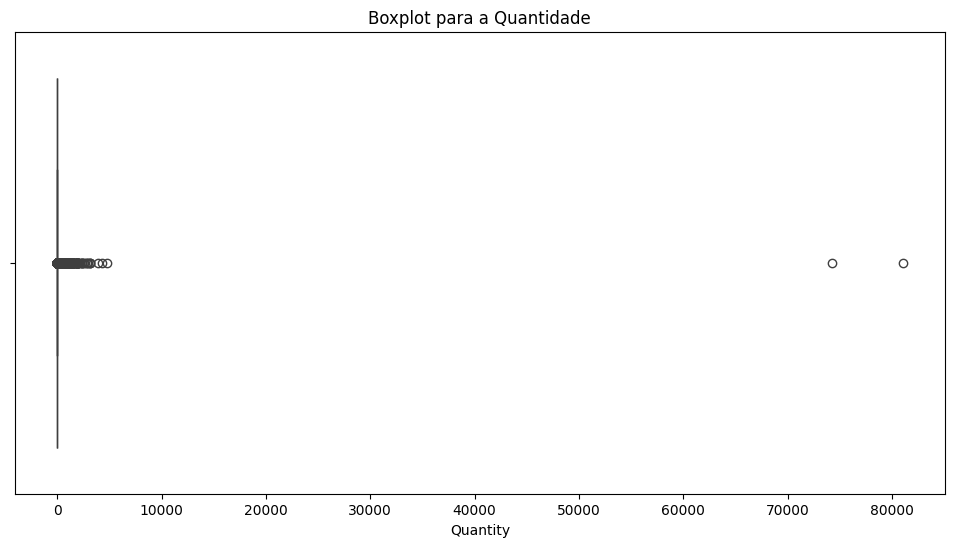

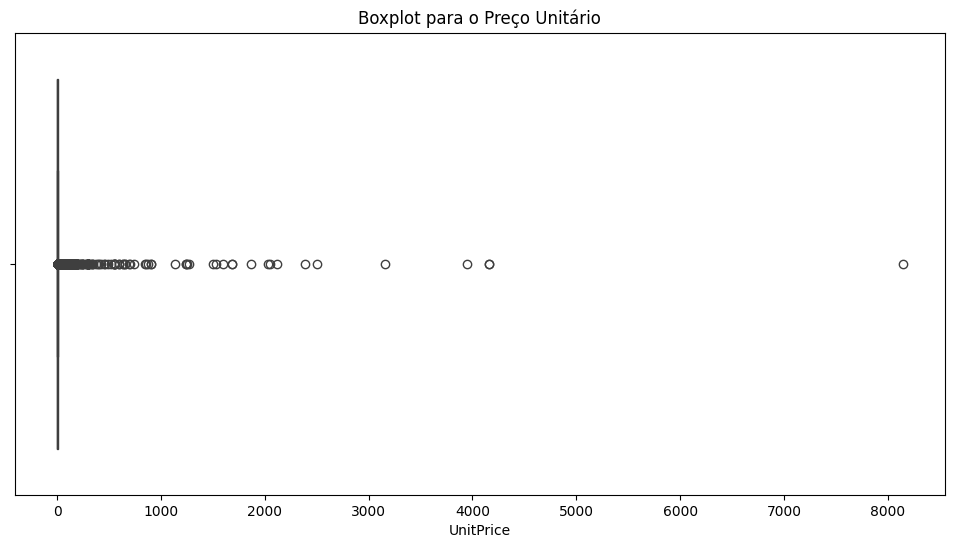

In [ ]:
# Visualizar outliers usando boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(x=df['Quantity'])
plt.title('Boxplot para a Quantidade')
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(x=df['UnitPrice'])
plt.title('Boxplot para o Preço Unitário')
plt.show()

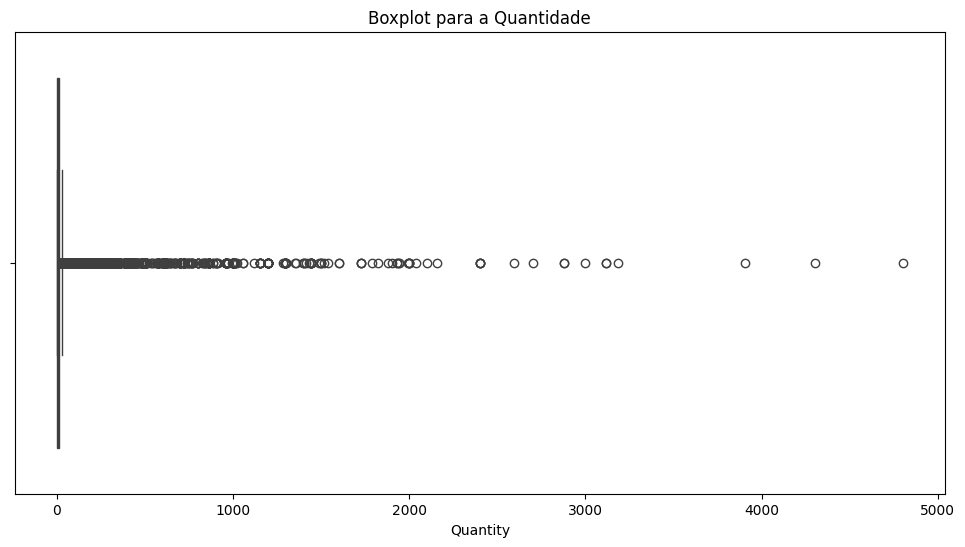

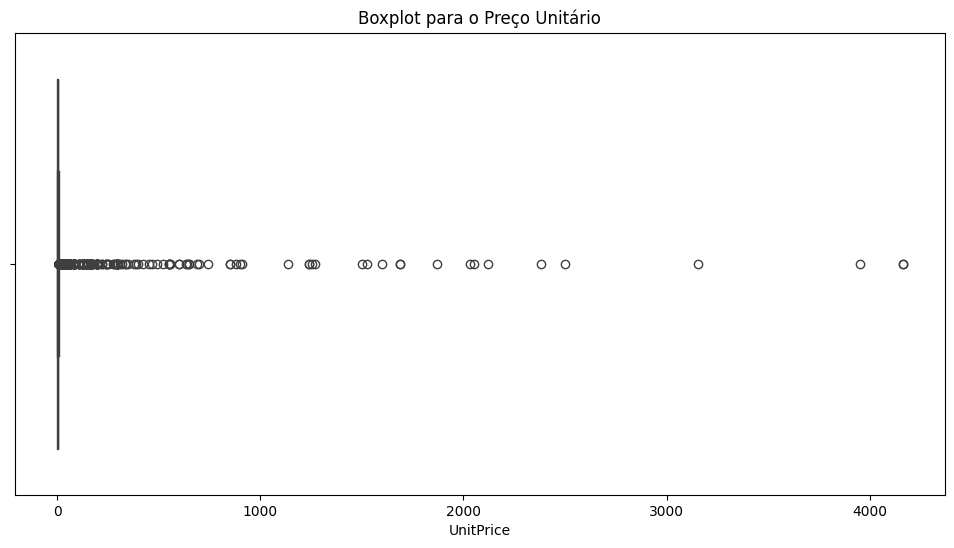

In [ ]:
# remoçao dos outliers extremos em que a quantidade do item na compra é superior a 10.000, e o preço unitário é maior que 5.000
df = df[(df['Quantity'] <= 10000) & (df['UnitPrice'] <= 5000)]

# Visualizar novamente o boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(x=df['Quantity'])
plt.title('Boxplot para a Quantidade')
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(x=df['UnitPrice'])
plt.title('Boxplot para o Preço Unitário')
plt.show()

In [ ]:
# Criçao de uma coluna adicional com o preço total da compra
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']

df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34


In [ ]:
# Calculando a data da última compra no dataset
data_ultima_compra = df['InvoiceDate'].max()
print(data_ultima_compra)

2011-12-09 12:50:00


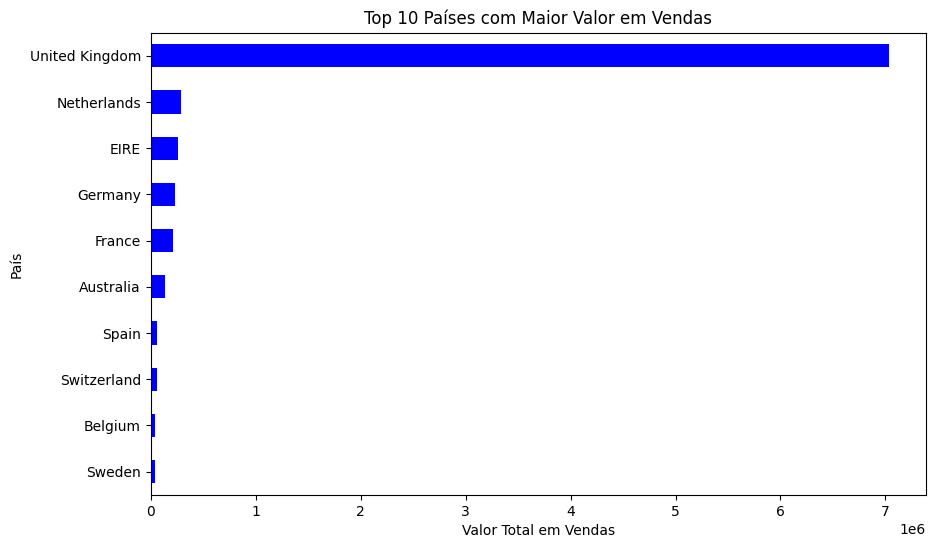

In [ ]:
# Top 10 países com maior valor em vendas
top_paises = df.groupby('Country')['TotalPrice'].sum().nlargest(10)
top_paises = top_paises.sort_values(ascending=True)  # Ordenar do maior para o menor
top_paises.plot(kind='barh', figsize=(10, 6), color='blue')
plt.title('Top 10 Países com Maior Valor em Vendas')
plt.xlabel('Valor Total em Vendas')
plt.ylabel('País')
plt.show()

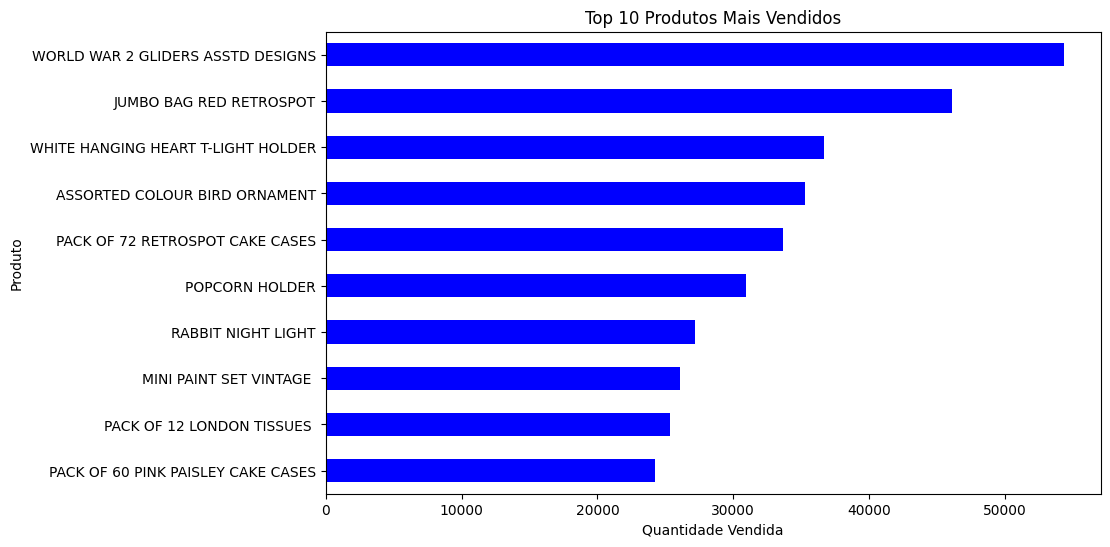

In [ ]:
# Top 10 produtos mais vendidos
top_produtos = df.groupby('Description')['Quantity'].sum().nlargest(10)
top_produtos = top_produtos.sort_values(ascending=True)  # Ordenar do maior para o menor
top_produtos.plot(kind='barh', figsize=(10, 6), color='blue')
plt.title('Top 10 Produtos Mais Vendidos')
plt.xlabel('Quantidade Vendida')
plt.ylabel('Produto')
plt.show()

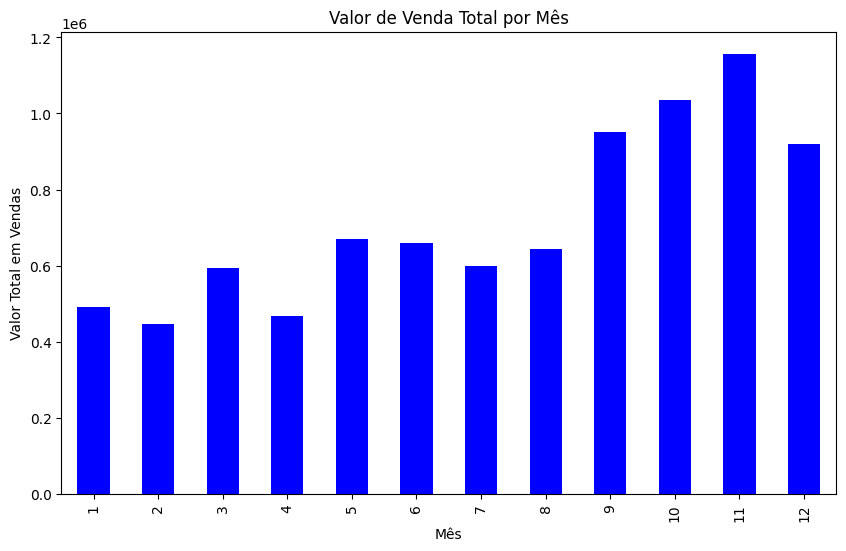

In [ ]:
df['Month'] = df['InvoiceDate'].dt.month
venda_por_mes = df.groupby('Month')['TotalPrice'].sum().sort_index()
venda_por_mes.plot(kind='bar', figsize=(10, 6), color='blue')
plt.title('Valor de Venda Total por Mês')
plt.xlabel('Mês')
plt.ylabel('Valor Total em Vendas')
plt.show()

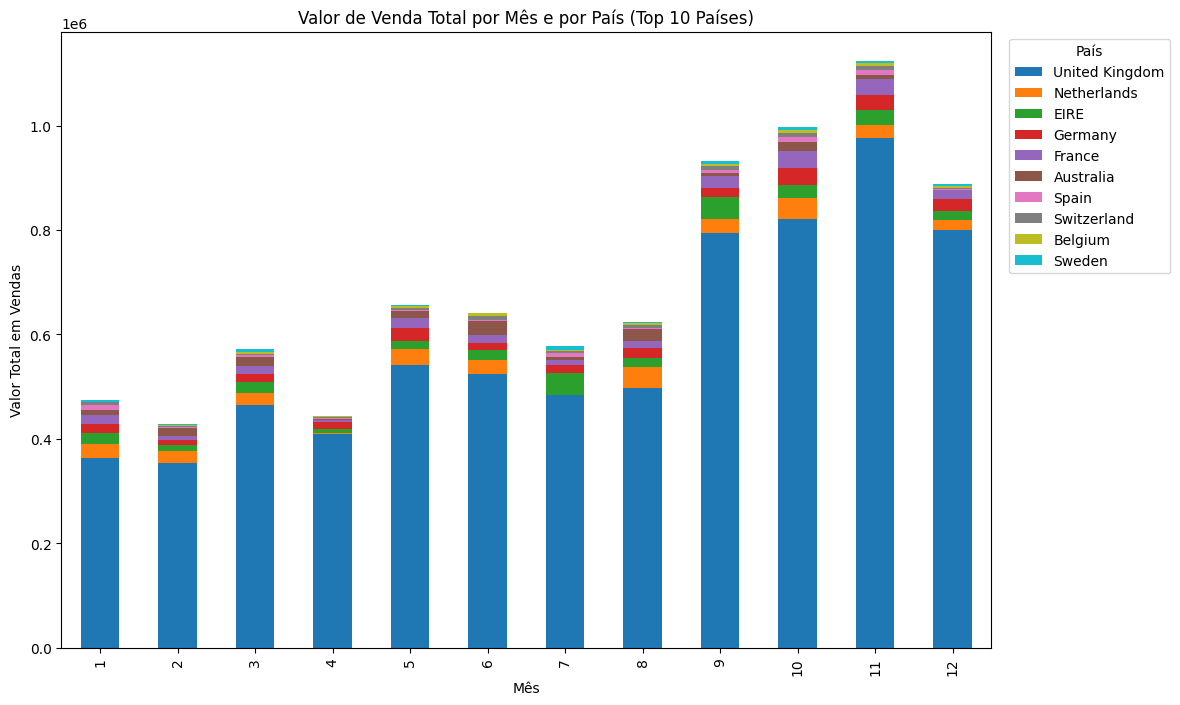

In [ ]:
# Valor de venda total por mês e por país (considerando apenas os top 10 países)
top_paises = df.groupby('Country')['TotalPrice'].sum().nlargest(10).index
venda_por_mes_pais = df[df['Country'].isin(top_paises)].groupby(['Month', 'Country'])['TotalPrice'].sum().unstack()
venda_por_mes_pais = venda_por_mes_pais[top_paises].sort_index(ascending=True)  # Ordenar do maior para o menor
venda_por_mes_pais.plot(kind='bar', figsize=(12, 8), stacked=True)
plt.title('Valor de Venda Total por Mês e por País (Top 10 Países)')
plt.xlabel('Mês')
plt.ylabel('Valor Total em Vendas')
plt.legend(title='País', loc='upper right', bbox_to_anchor=(1.2, 1))
plt.show()

In [ ]:
# Calculando RFM
rfm = df.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (data_ultima_compra - x.max()).days,  # Recência
    'InvoiceNo': 'nunique',  # Frequência
    'TotalPrice': 'mean'  # Ticket Médio
}).reset_index()

# Renomeando as colunas
rfm.columns = ['CustomerID', 'Recencia', 'Frequencia', 'TicketMedio']

# Exibindo o resultado
print(rfm.head())

   CustomerID  Recencia  Frequencia  TicketMedio
0       12347         1           7    23.681319
1       12348        74           4    57.975484
2       12349        18           1    24.076027
3       12350       309           1    19.670588
4       12352        35           8    29.482824
